# Medical Cost Prediction - Healthcare Domain

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Loading the Dataset
medical = pd.read_csv("D:\Data\Machine_Learning\insurance.csv")

### Inspecting the dataset

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Cleaning

In [5]:
medical.duplicated()
medical.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

False    1337
True        1
dtype: int64

In [6]:
medical[medical.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
# Droping the duplicates

medical.drop_duplicates(keep = 'first', inplace=True)
medical.reset_index(inplace=True)

In [8]:
medical.drop(['index'], axis=1, inplace=True)

### Checking the Missing Values

In [9]:
medical.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# To Check Wheather the Corrupted Values or not.
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [11]:
# descriptive Statistics

medical.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
medical.mean()
print('=='*15)
medical.median()
print('=='*15)
medical.skew()
print('=='*15)
medical.kurt()

age            39.222139
bmi            30.663452
children        1.095737
charges     13279.121487
dtype: float64

age           39.0000
bmi           30.4000
children       1.0000
charges     9386.1613
dtype: float64

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

age        -1.244406
bmi        -0.052947
children    0.200954
charges     1.604221
dtype: float64

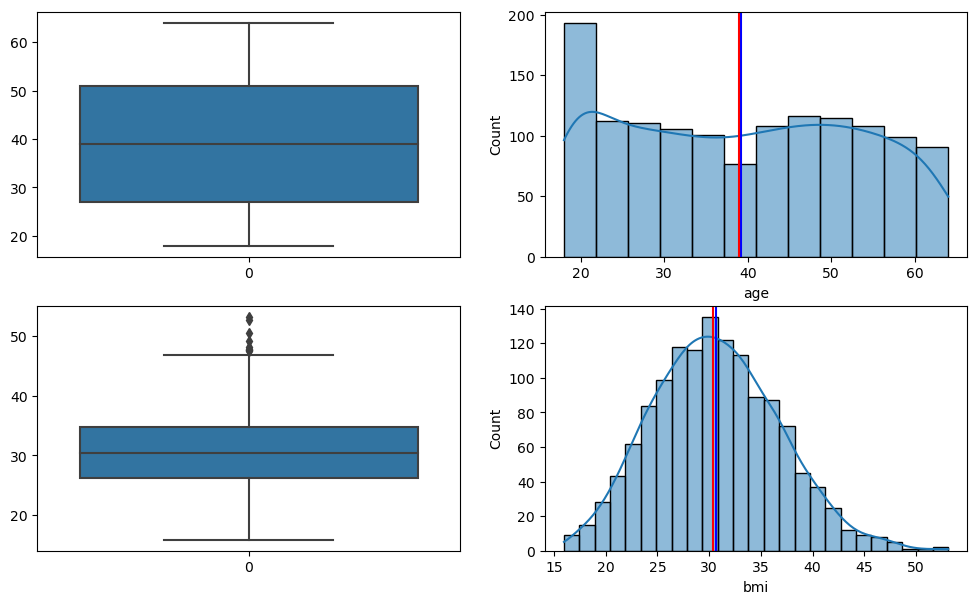

In [13]:
plt.figure(figsize=(12,7))

plt.subplot(221)
sns.boxplot(medical.age)

plt.subplot(222)
sns.histplot(medical.age, kde = True)
plt.axvline(medical.age.mean(), color = 'blue')
plt.axvline(medical.age.median(), color = 'red');

plt.subplot(223)
sns.boxplot(medical.bmi)

plt.subplot(224)
sns.histplot(medical.bmi, kde = True)
plt.axvline(medical.bmi.mean(), color = 'blue')
plt.axvline(medical.bmi.median(), color = 'red');

# Conclusion:
# Outliers are present in bmi column.

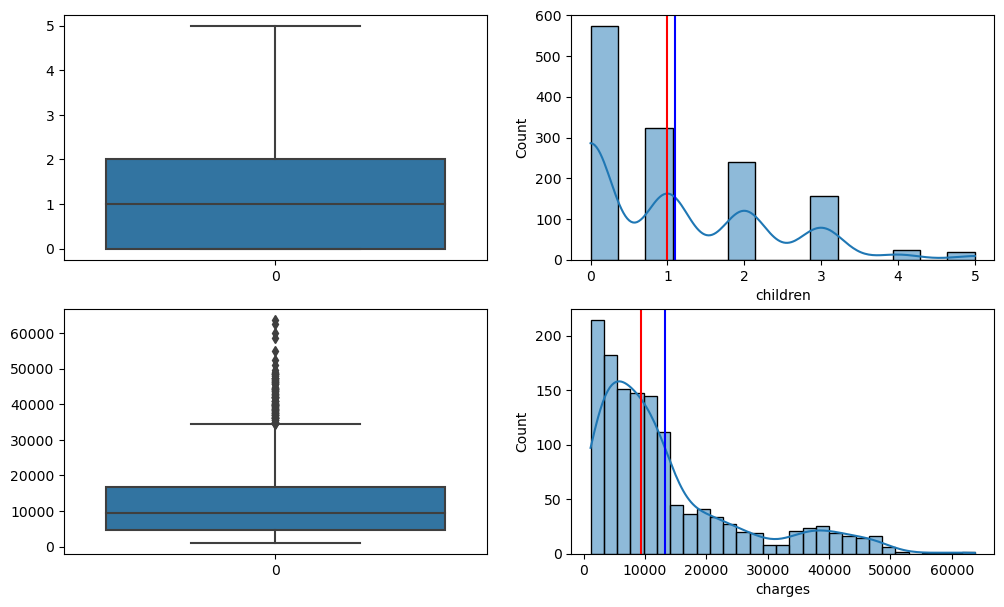

In [14]:
plt.figure(figsize=(12,7))

plt.subplot(221)
sns.boxplot(medical.children)

plt.subplot(222)
sns.histplot(medical.children, kde = True)
plt.axvline(medical.children.mean(), color = 'blue')
plt.axvline(medical.children.median(), color = 'red');

plt.subplot(223)
sns.boxplot(medical.charges)

plt.subplot(224)
sns.histplot(medical.charges, kde = True)
plt.axvline(medical.charges.mean(), color = 'blue')
plt.axvline(medical.charges.median(), color = 'red');

# Conclusion:
# Outliers are present in charges column.

In [15]:
Q1, Q2, Q3 = tuple(medical.charges.quantile(q = [0.25,0.5,0.75]).values)
print(Q1, Q2, Q3)

4746.344 9386.1613 16657.71745


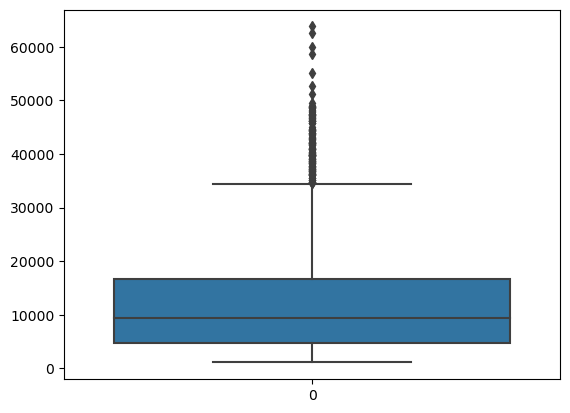

In [16]:
sns.boxplot(medical.charges);

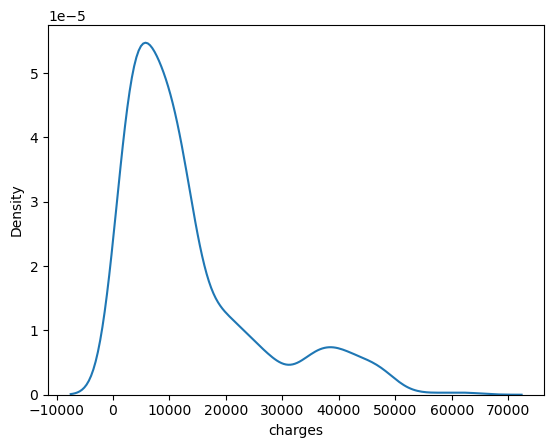

In [17]:
sns.kdeplot(medical.charges);

### Applying the Transforming Techniques
- By applying some transformations to these skewed variables, we can map this skewed distribution to a normal distribution to increase the performance of our models. 

In [18]:
from scipy.stats import boxcox
x,y = boxcox(medical.charges);

In [19]:
y

0.043516942579678274

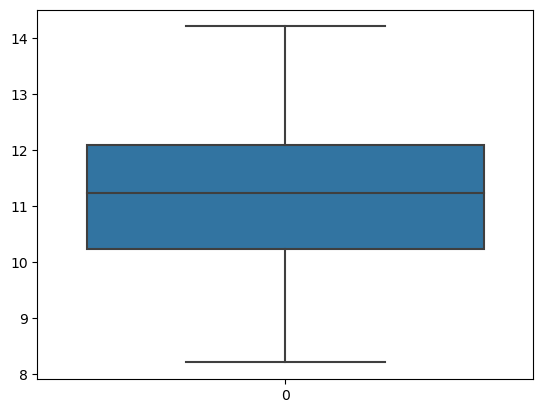

In [20]:
sns.boxplot(x);

In [21]:
from scipy.special import inv_boxcox

In [22]:
inv_boxcox(x,0.043516942579678274)

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [23]:
medical['charges_log'] = np.log(medical.charges)
medical # Checking the Transformation values using Log Transformations

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,9.268661
1333,18,female,31.920,0,no,northeast,2205.98080,7.698927
1334,18,female,36.850,0,no,southeast,1629.83350,7.396233
1335,21,female,25.800,0,no,southwest,2007.94500,7.604867


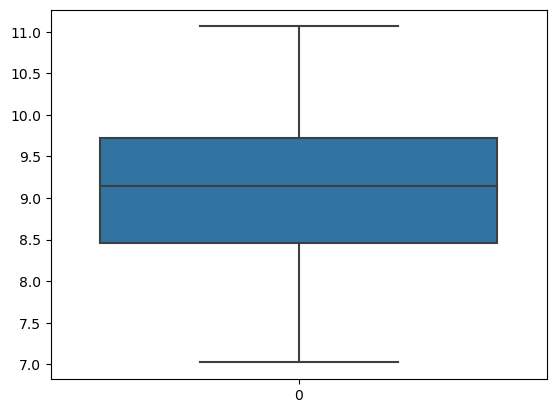

In [24]:
sns.boxplot(medical.charges_log);

## @Observations:
- By Applying the log transformation we can reduce the complete outliers.

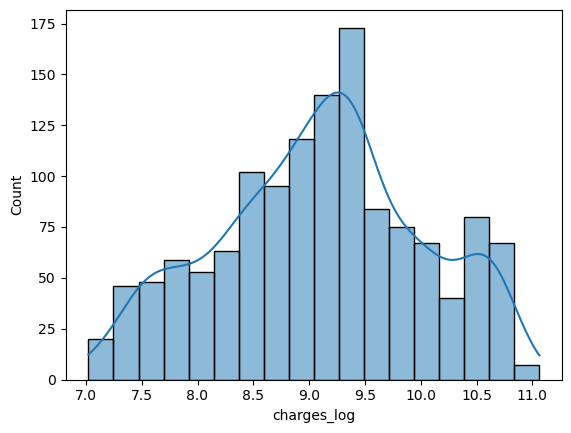

In [25]:
sns.histplot(medical.charges_log, kde=True);

## Analysis

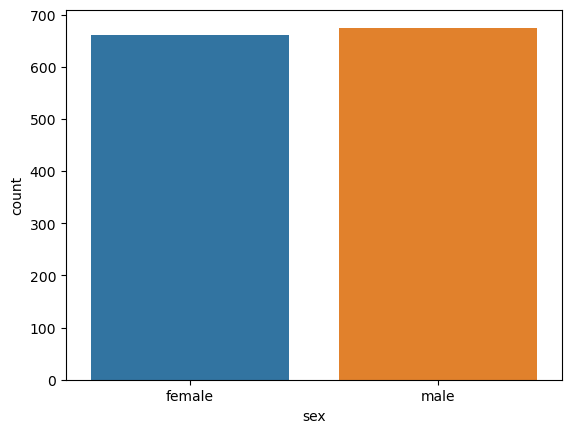

In [26]:
sns.countplot(x = medical.sex);

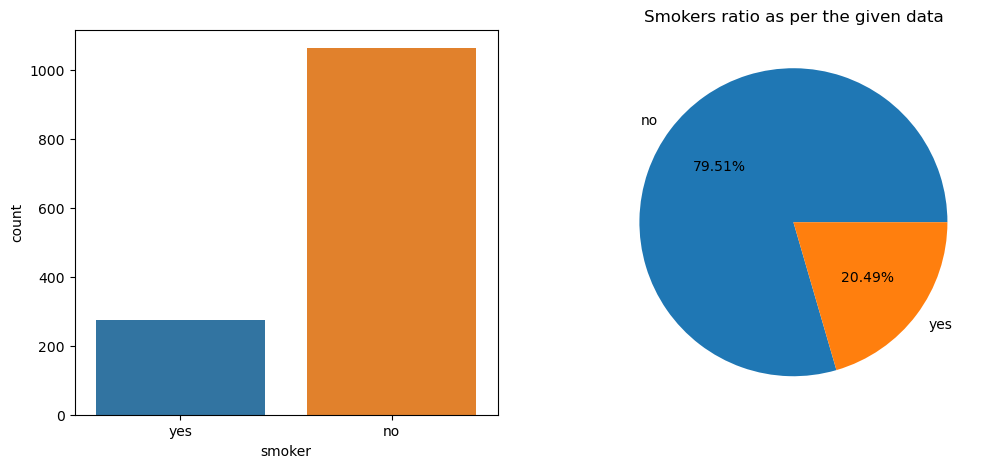

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(x=medical.smoker)
plt.subplot(122)
plt.title('Smokers ratio as per the given data')
plt.pie(medical.smoker.value_counts().values,labels=medical.smoker.value_counts().index, autopct='%.2f%%');


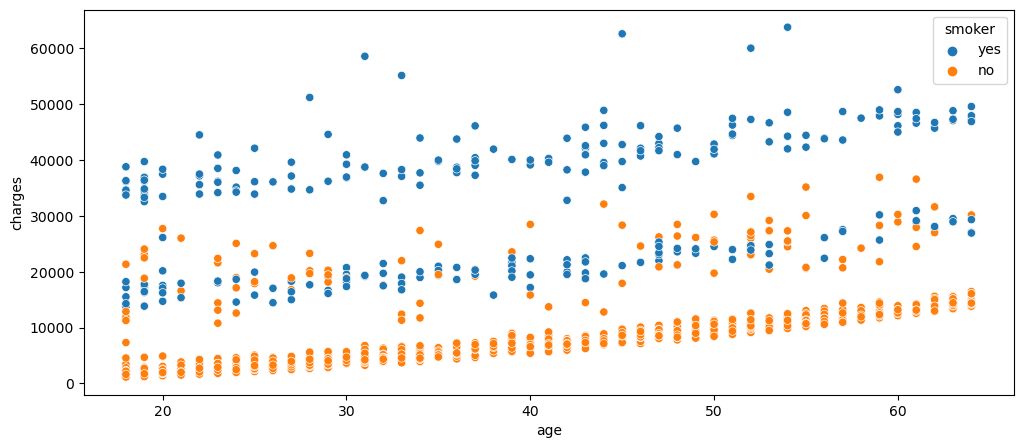

In [28]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=medical.age, y=medical.charges, hue=medical.smoker);

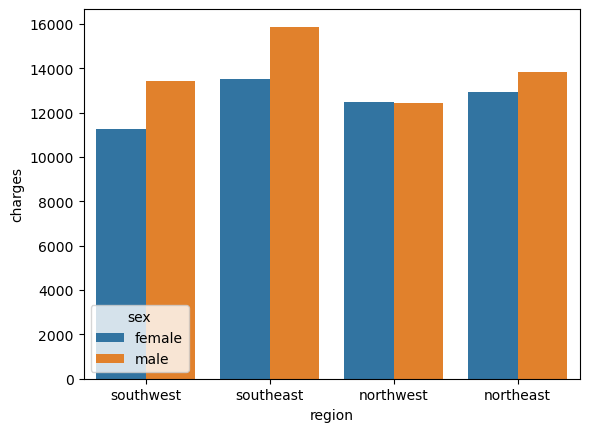

In [29]:
sns.barplot(x=medical.region, y=medical.charges, ci= False, hue=medical.sex);

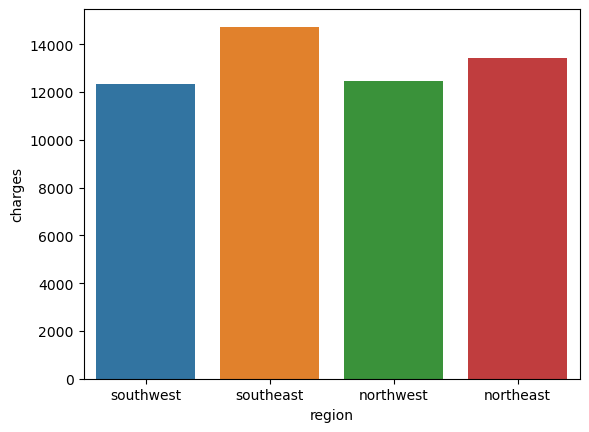

In [30]:
sns.barplot(x=medical.region, y=medical.charges, ci= False);

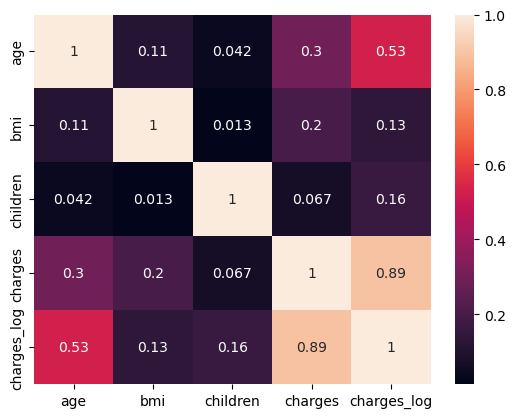

In [31]:
sns.heatmap(medical.corr(), annot=True);

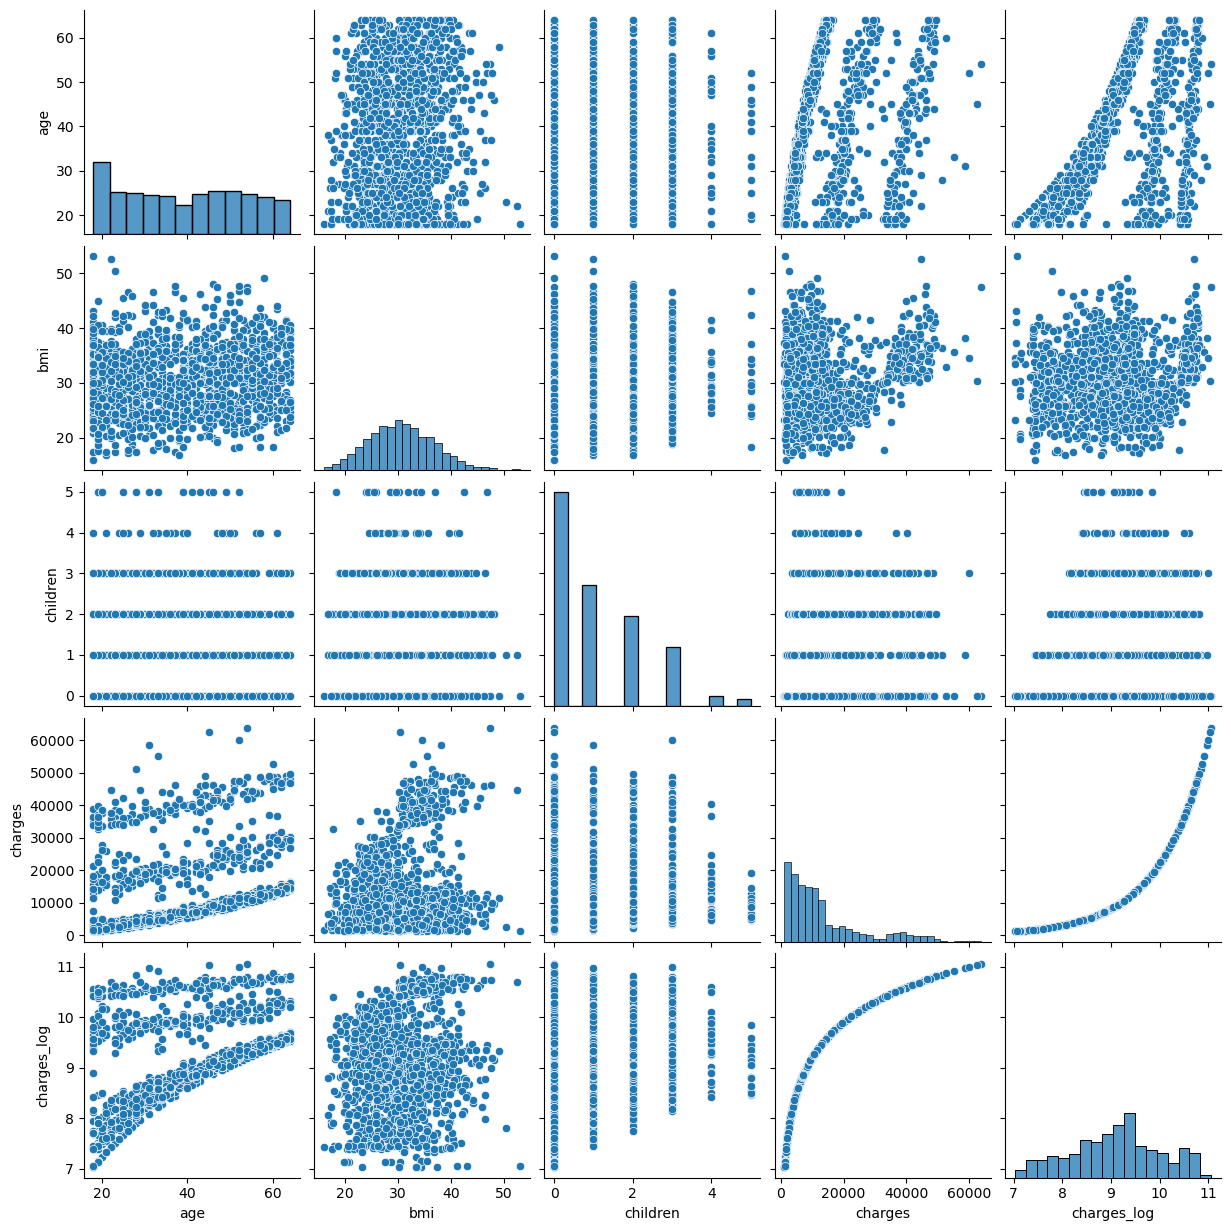

In [32]:
sns.pairplot(medical);

## Machine Learning Problem
#### Build a system which can take features of medical Insurance like age, sex, bmi, children, smoker, region etc.. and predict the medical costs billed by health insurance.

Target Variable: Charges

## Identifying the Input and Output Variables

In [33]:
y = medical['charges_log']
X = medical.drop(['charges_log','charges'], axis=1)

In [34]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1002, 6) (1002,)
(335, 6) (335,)


In [35]:
X_train
y_train

,age,sex,bmi,children,smoker,region
999,30,male,22.990,2,yes,northwest
884,32,male,28.930,1,yes,southeast
517,45,male,30.495,2,no,northwest
1131,57,male,40.280,0,no,northeast
1187,43,female,25.270,1,yes,northeast
...,...,...,...,...,...,...
802,18,female,42.240,0,yes,southeast
53,36,male,34.430,0,yes,southeast
350,57,female,23.180,0,no,northwest
79,41,female,32.965,0,no,northwest


999      9.762026
884      9.889373
517      9.037588
1131     9.938325
1187     9.988350
          ...    
802     10.565987
53      10.538544
350      9.378445
79       8.790425
792      9.961559
Name: charges_log, Length: 1002, dtype: float64

## Separating Categorical and Numerical Columns:

In [36]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [37]:
X_train_num.head()

,age,bmi,children
999,30,22.990,2
884,32,28.930,1
517,45,30.495,2
1131,57,40.280,0
1187,43,25.270,1


In [38]:
X_train_cat = X_train.select_dtypes(include=['object'])

In [39]:
X_train_cat

,sex,smoker,region
999,male,yes,northwest
884,male,yes,southeast
517,male,no,northwest
1131,male,no,northeast
1187,female,yes,northeast
...,...,...,...
802,female,yes,southeast
53,male,yes,southeast
350,female,no,northwest
79,female,no,northwest


## Scaling the Numerical Features

In [40]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,age,bmi,children
999,-0.644567,-1.234380,0.785181
884,-0.502636,-0.267219,-0.065361
517,0.419914,-0.012403,0.785181
1131,1.271498,1.580808,-0.915903
1187,0.277983,-0.863146,-0.065361


## Scaling the Categorical Features

## Applying OneHotEncoding on Categorical Columns

In [41]:
X_train_cat['sex'].value_counts(normalize=True)
print('-'*30)
X_train_cat['smoker'].value_counts(normalize=True)
print('-'*30)
X_train_cat['region'].value_counts(normalize=True)

male      0.505988
female    0.494012
Name: sex, dtype: float64

------------------------------


no     0.790419
yes    0.209581
Name: smoker, dtype: float64

------------------------------


southeast    0.270459
southwest    0.250499
northeast    0.240519
northwest    0.238523
Name: region, dtype: float64

In [42]:
# scaling the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
999,1.0,1.0,1.0,0.0,0.0
884,1.0,1.0,0.0,1.0,0.0
517,1.0,0.0,1.0,0.0,0.0
1131,1.0,0.0,0.0,0.0,0.0
1187,0.0,1.0,0.0,0.0,0.0


## Concatenating the Encoded Categorical Features and Transformed Numerical Features

In [43]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
999,-0.644567,-1.234380,0.785181,1.0,1.0,1.0,0.0,0.0
884,-0.502636,-0.267219,-0.065361,1.0,1.0,0.0,1.0,0.0
517,0.419914,-0.012403,0.785181,1.0,0.0,1.0,0.0,0.0
1131,1.271498,1.580808,-0.915903,1.0,0.0,0.0,0.0,0.0
1187,0.277983,-0.863146,-0.065361,0.0,1.0,0.0,0.0,0.0


### Preparing Test Data

In [44]:
X_test.head()
print('='*45)
X_test.info()

,age,sex,bmi,children,smoker,region
12,23,male,34.400,0,no,southwest
306,28,female,27.500,2,no,southwest
318,44,female,27.645,0,no,northwest
815,24,female,24.225,0,no,northwest
157,18,male,25.175,0,yes,northeast


<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 12 to 624
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 18.3+ KB


In [45]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,sex,smoker,region
12,male,no,southwest
306,female,no,southwest
318,female,no,northwest
815,female,no,northwest
157,male,yes,northeast


In [46]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,age,bmi,children
12,23,34.400,0
306,28,27.500,2
318,44,27.645,0
815,24,24.225,0
157,18,25.175,0


In [47]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,age,bmi,children
12,-1.141324,0.623416,-0.915903
306,-0.786497,-0.500054,0.785181
318,0.348948,-0.476444,-0.915903
815,-1.070359,-1.033295,-0.915903
157,-1.496151,-0.878614,-0.915903


In [48]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
12,1.0,0.0,0.0,0.0,1.0
306,0.0,0.0,0.0,0.0,1.0
318,0.0,0.0,1.0,0.0,0.0
815,0.0,0.0,1.0,0.0,0.0
157,1.0,1.0,0.0,0.0,0.0


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [49]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
12,-1.141324,0.623416,-0.915903,1.0,0.0,0.0,0.0,1.0
306,-0.786497,-0.500054,0.785181,0.0,0.0,0.0,0.0,1.0
318,0.348948,-0.476444,-0.915903,0.0,0.0,1.0,0.0,0.0
815,-1.070359,-1.033295,-0.915903,0.0,0.0,1.0,0.0,0.0
157,-1.496151,-0.878614,-0.915903,1.0,1.0,0.0,0.0,0.0


## Feature Engineering

In [50]:
from sklearn.linear_model import LinearRegression

regressor_linear = LinearRegression()

In [51]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor_linear, n_features_to_select=4)

rfe = rfe.fit(X_train_transformed, y_train)

In [52]:
temp_df = pd.DataFrame({'Columns' : X_train_transformed.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df

,Columns,Included,Ranking
0,age,True,1
1,bmi,False,4
2,children,True,1
3,sex_male,True,1
4,smoker_yes,True,1
5,region_northwest,False,5
6,region_southeast,False,3
7,region_southwest,False,2


In [53]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [54]:
regressor.feature_importances_

array([0.38470449, 0.10059386, 0.0342483 , 0.01099889, 0.44538295,
       0.0066383 , 0.01264353, 0.00478968])

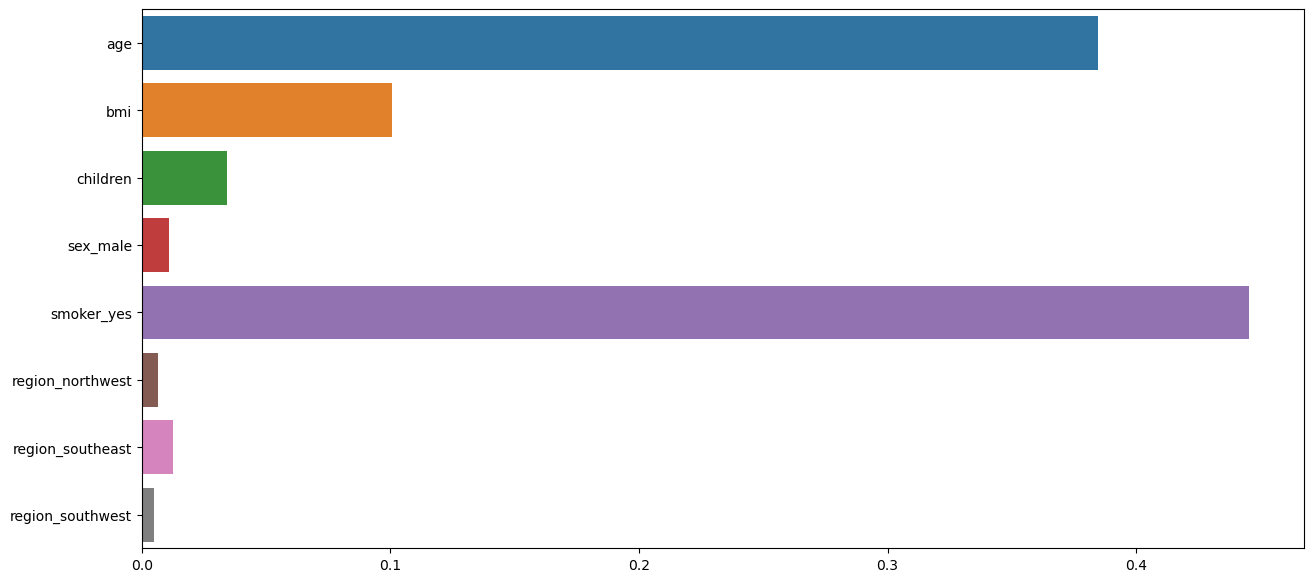

In [55]:
plt.figure(figsize=(15,7))
sns.barplot(x = regressor.feature_importances_, y = X_train_transformed.columns);

In [56]:
X_train_transformed.head()
X_train_transformed.columns

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
999,-0.644567,-1.234380,0.785181,1.0,1.0,1.0,0.0,0.0
884,-0.502636,-0.267219,-0.065361,1.0,1.0,0.0,1.0,0.0
517,0.419914,-0.012403,0.785181,1.0,0.0,1.0,0.0,0.0
1131,1.271498,1.580808,-0.915903,1.0,0.0,0.0,0.0,0.0
1187,0.277983,-0.863146,-0.065361,0.0,1.0,0.0,0.0,0.0


Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [57]:
X_train_transformed.drop(['region_northwest', 'region_southeast', 'region_southwest','sex_male'],axis=1,inplace=True)

In [58]:
X_test_transformed.drop(['region_northwest', 'region_southeast', 'region_southwest','sex_male'],axis=1,inplace=True)

In [59]:
X_train_transformed.head()
X_test_transformed.head()

,age,bmi,children,smoker_yes
999,-0.644567,-1.234380,0.785181,1.0
884,-0.502636,-0.267219,-0.065361,1.0
517,0.419914,-0.012403,0.785181,0.0
1131,1.271498,1.580808,-0.915903,0.0
1187,0.277983,-0.863146,-0.065361,1.0


,age,bmi,children,smoker_yes
12,-1.141324,0.623416,-0.915903,0.0
306,-0.786497,-0.500054,0.785181,0.0
318,0.348948,-0.476444,-0.915903,0.0
815,-1.070359,-1.033295,-0.915903,0.0
157,-1.496151,-0.878614,-0.915903,1.0


## Hyperparameter Tunning and Model Buliding

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
from sklearn.linear_model import Ridge
tuned_parameters = [{'alpha':[i for i in range(1, 20)]}]

clf = GridSearchCV(
    estimator=Ridge(),
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                    14, 15, 16, 17, 18, 19]}],
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print('R2 Score: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'alpha': 1}
Ridge(alpha=1)
R2 Score:  0.7377777268026353


In [63]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005229,6.457400e-03,0.001400,7.997752e-04,1,{'alpha': 1},0.781518,0.841620,0.662545,0.778209,...,0.764358,0.058075,1,0.764494,0.747919,0.794706,0.764837,0.768565,0.768104,0.015093
1,0.002844,7.956801e-04,0.001414,5.088559e-04,2,{'alpha': 2},0.781968,0.840935,0.663160,0.778008,...,0.764320,0.057703,2,0.764423,0.747847,0.794629,0.764763,0.768494,0.768031,0.015091
2,0.001224,3.888140e-04,0.001408,4.829829e-04,3,{'alpha': 3},0.782355,0.840209,0.663723,0.777761,...,0.764235,0.057335,3,0.764306,0.747731,0.794505,0.764643,0.768378,0.767913,0.015089
3,0.001820,7.308696e-04,0.001436,5.370813e-04,4,{'alpha': 4},0.782683,0.839446,0.664235,0.777469,...,0.764104,0.056972,4,0.764146,0.747571,0.794334,0.764479,0.768220,0.767750,0.015085
4,0.001643,5.262651e-04,0.001204,4.088165e-04,5,{'alpha': 5},0.782953,0.838647,0.664699,0.777135,...,0.763930,0.056613,5,0.763945,0.747370,0.794119,0.764273,0.768021,0.767545,0.015080
5,0.001612,4.729717e-04,0.001200,3.995427e-04,6,{'alpha': 6},0.783169,0.837813,0.665116,0.776761,...,0.763714,0.056258,6,0.763704,0.747130,0.793861,0.764026,0.767783,0.767301,0.015075
6,0.002044,5.424819e-05,0.001405,4.845366e-04,7,{'alpha': 7},0.783332,0.836947,0.665489,0.776347,...,0.763458,0.055908,7,0.763425,0.746852,0.793563,0.763740,0.767507,0.767017,0.015068
7,0.001599,4.897267e-04,0.001214,4.270316e-04,8,{'alpha': 8},0.783445,0.836050,0.665818,0.775897,...,0.763165,0.055561,8,0.763110,0.746538,0.793226,0.763418,0.767195,0.766697,0.015060
8,0.002005,6.396718e-04,0.001195,4.009509e-04,9,{'alpha': 9},0.783509,0.835124,0.666106,0.775412,...,0.762834,0.055219,9,0.762761,0.746189,0.792853,0.763060,0.766849,0.766342,0.015052
9,0.001600,4.896874e-04,0.001000,2.336015e-07,10,{'alpha': 10},0.783527,0.834171,0.666355,0.774893,...,0.762469,0.054880,10,0.762378,0.745808,0.792443,0.762669,0.766470,0.765954,0.015042


### Training the data
### Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [65]:
y_test_pred = regressor.predict(X_test_transformed)

In [66]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('=='*30)
print('R2 Score: ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  0.27155406416651645
Mean Squared Error:  0.1919048547569076
Root Mean Squared Error:  0.43806946339240266
R2 Score:  0.7381030509600752


In [67]:
linear_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
linear_df.head()

,Actual,Predicted
12,7.510345,8.122394
306,9.912332,8.447100
318,8.912095,8.812853
815,7.952531,8.060664
157,9.649768,9.372771


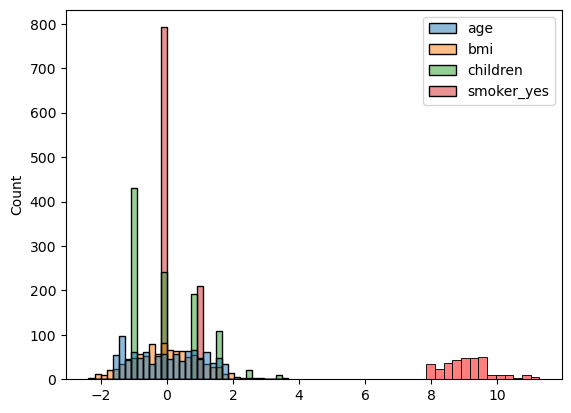

In [68]:
sns.histplot(X_train_transformed, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

### KNN Regression

In [69]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [70]:
y_test_pred = regressor.predict(X_test_transformed)

In [71]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
knn_df.head()

,Actual,Predicted
12,7.510345,7.726263
306,9.912332,8.373143
318,8.912095,9.113681
815,7.952531,8.270246
157,9.649768,9.693977


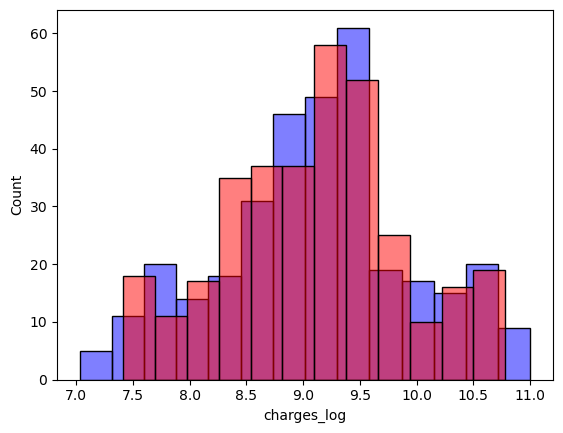

In [72]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [73]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  0.2302380960158586


### Decision Tree Regression

In [74]:
from sklearn.tree import DecisionTreeRegressor
tuned_parameters = [{'max_depth':[i for i in range(1, 51)]}]

dt = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
dt.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [75]:
print("Best parameters set found on train set")
print(dt.best_params_)
print(dt.best_estimator_)
print('R2 Score: ', dt.score(X_test_transformed, y_test))

Best parameters set found on train set
{'max_depth': 4}
DecisionTreeRegressor(max_depth=4)
R2 Score:  0.8186231076970201


### Random Forest Regression

In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [77]:
y_test_pred = regressor.predict(X_test_transformed)
rfr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

rfr_df.head()

,Actual,Predicted
12,7.510345,8.287265
306,9.912332,8.396992
318,8.912095,9.299992
815,7.952531,8.059911
157,9.649768,9.720239


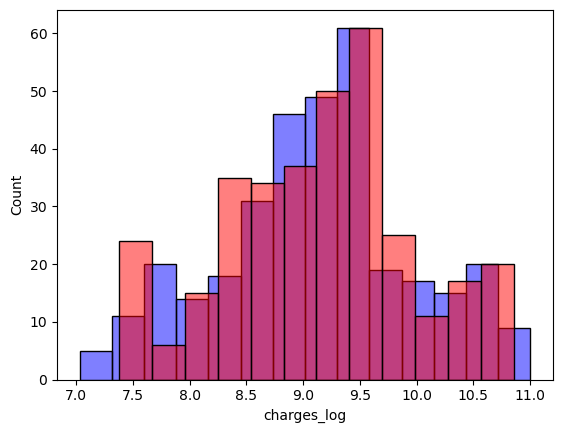

In [78]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [79]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('=='*30)
print('R2 Score: ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  0.22721792852662767
Mean Squared Error:  0.1766215796669859
Root Mean Squared Error:  0.42026370253328554
R2 Score:  0.7589604863931634


### Support Vector Regression

In [80]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed, y_train)

SVR()

In [81]:
y_test_pred = regressor.predict(X_test_transformed)
svc_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

svc_df.head()

,Actual,Predicted
12,7.510345,7.786769
306,9.912332,8.425390
318,8.912095,8.890112
815,7.952531,7.817182
157,9.649768,9.564270


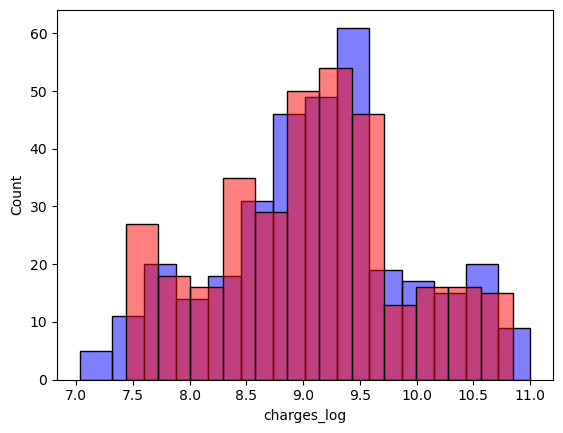

In [82]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [83]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  0.16940697874429778


## GradientBoostingRegressor

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

GradientBoostingRegressor()

In [85]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('=='*30)
print('R2 Score: ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  0.19125289170169904
Mean Squared Error:  0.1273157241901217
Root Mean Squared Error:  0.3568132903776451
R2 Score:  0.826249316243516


## Conclusion:
- Byseening all the Algorithms `GBDT(GradientBoostingRegressor)` is performing better compared to the other algorthims for the medical cost prediction.
- `GBDT(GradientBoostingRegressor)` is the less Error of `Mean Squared Error:  0.12721017050379035`.

___